# Problem 1.9 

## Problem Statement 

A particle of mass $m$ is in the state $$\Psi(x,t) = A e^{-a[(mx^2/\hbar)+it]},$$

where $A$ and $a$ are positive real constants.

* Find $A$
* For what potential energy function $V(x)$ does $\Psi$ satisfy the Schr\"odinger equation?
* Calculate expectation values of $x$, $x^2$, $p$, $p^2$.
* Verify that products are consistent with the uncertainty principle.


In [13]:
import sympy as sp
from sympy.physics.quantum.constants import hbar

sp.init_printing()

A, a, m = sp.symbols ("A a m", real = True, positive = True)
x, t = sp.symbols ("x t", real = True)

Psi = A*sp.exp(-a*((m*x**2/hbar)+sp.I*t))
Psi

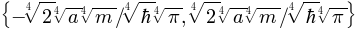

In [19]:
#Psi squared 
Psisq = Psi*sp.conjugate(Psi)

#set normalization condition
normalization_condition  = sp.Eq(1, sp.integrate(Psisq, (x, -sp.oo, sp.oo)))

#solve for A
values= sp.solveset (normalization_condition, A)
values

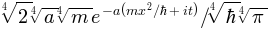

In [20]:
Psi = Psi.subs(A, next(iter(values)))
Psi

## Part b solving for V(x) 


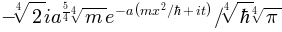

In [22]:
DerPsi = sp.diff(Psi, t)
DerPsi

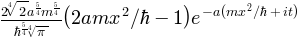

In [25]:
SderPsi = sp.diff(Psi, x, 2)
SderPsi

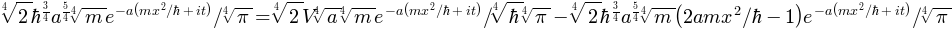

In [31]:
V = sp.symbols("V", real=True)
ShE = sp.Eq(sp.I*hbar*DerPsi, -hbar**2/(2*m)*SderPsi + V*Psi)
ShE

In [32]:
Vx = sp.solveset(ShE, V)
Vx

In [33]:
sp.Eq(V, next(iter(Vx)).simplify())

## Part c, determining the expectation values. 

In [42]:
ExpX = sp.integrate(sp.conjugate(Psi)*x*Psi, (x, -sp.oo, sp.oo))
ExpXsq = sp.integrate(sp.conjugate(Psi)*x**2*Psi, (x, -sp.oo, sp.oo))

ExpP = -hbar*sp.I*sp.integrate(sp.conjugate(Psi)*sp.diff(Psi, x), (x, -sp.oo, sp.oo))
ExpPsq = -hbar**2*sp.integrate(sp.conjugate(Psi)*sp.diff(Psi, x, 2), (x, -sp.oo, sp.oo))

In [36]:
ExpX

In [37]:
ExpXsq

In [38]:
ExpP

In [43]:
ExpPsq

## Part d, varifying the uncertainty principal 

In [48]:
SigmaX = sp.sqrt(ExpXsq - ExpX**2)
SigmaP = sp.sqrt(ExpPsq - ExpP**2)


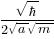

In [49]:
SigmaX

In [50]:
SigmaP

In [51]:
SigmaX*SigmaP